# Problem Statement

Misclassifications can reveal a lot about the boundaries of performance of a classifier. Develop a visualization that helps dig into misclassified datapoints in the test set. A simple approach for a binary classifier would be to plot a histogram of the predicted class probabilities across the misclassified test samples in each class.



In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score

In [28]:
clf = RandomForestClassifier()

In [29]:
current_dir = os.path.abspath(os.getcwd())

dataset_path = os.path.join(current_dir, '..', 'datasets', 'winequality.csv')

In [30]:
wine = pd.read_csv(dataset_path)
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,recommend
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,False
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,False
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,False
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,False
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,False
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,False
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,False
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,False


Recommend column was dropped from the dataframe because it is 100% dependent on the quality column and would therefore cause bias in prediction

In [31]:
wine_m = wine.drop(['recommend'], axis=1)

In [32]:
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(wine_m, wine_m['quality']):
    train = wine_m.loc[train_index]
    test = wine_m.loc[test_index]
        
    x = train.drop(['quality'], axis=1)
    y = train['quality']
        
    a = test.drop(['quality'], axis=1)
    b = test['quality']

In [33]:
clf.fit(x, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
predictions = clf.predict(a)

#probabilities
probabilities = clf.predict_proba(a)

In [35]:
test['predicted'] = predictions

- convert probabilities to a df and then join it with the test df so

In [36]:
probab = pd.DataFrame(probabilities)
probab.head()

,0,1,2,3,4,5,6
0,0.0,0.0,0.7,0.3,0.0,0.0,0.0
1,0.0,0.0,0.0,0.9,0.1,0.0,0.0
2,0.0,0.1,0.1,0.8,0.0,0.0,0.0
3,0.0,0.0,0.0,0.7,0.2,0.1,0.0
4,0.0,0.0,0.1,0.5,0.3,0.1,0.0


In [37]:
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,predicted
1740,6.6,0.37,0.47,6.5,0.061,23.0,150.0,0.99540,3.14,0.45,9.6,6,5
2658,6.5,0.15,0.44,12.6,0.052,65.0,158.0,0.99688,3.26,0.70,10.3,7,6
1203,5.0,0.33,0.16,1.5,0.049,10.0,97.0,0.99170,3.48,0.44,10.7,6,6
3985,6.8,0.11,0.27,8.6,0.044,45.0,104.0,0.99454,3.20,0.37,9.9,6,6
2945,4.9,0.33,0.31,1.2,0.016,39.0,150.0,0.98713,3.33,0.59,14.0,8,6


The indx of the test df is random because of the random shuffle split, change the index to 0 - len(test) and then join with probabilities df

In [38]:
test_copy = test.copy()

In [39]:
test_copy.index = np.arange(0, len(test_copy))

In [40]:
full = pd.concat([test_copy, probab], axis=1)

In [41]:
full.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,predicted,0,1,2,3,4,5,6
0,6.6,0.37,0.47,6.5,0.061,23.0,150.0,0.99540,3.14,0.45,9.6,6,5,0.0,0.0,0.7,0.3,0.0,0.0,0.0
1,6.5,0.15,0.44,12.6,0.052,65.0,158.0,0.99688,3.26,0.70,10.3,7,6,0.0,0.0,0.0,0.9,0.1,0.0,0.0
2,5.0,0.33,0.16,1.5,0.049,10.0,97.0,0.99170,3.48,0.44,10.7,6,6,0.0,0.1,0.1,0.8,0.0,0.0,0.0
3,6.8,0.11,0.27,8.6,0.044,45.0,104.0,0.99454,3.20,0.37,9.9,6,6,0.0,0.0,0.0,0.7,0.2,0.1,0.0
4,4.9,0.33,0.31,1.2,0.016,39.0,150.0,0.98713,3.33,0.59,14.0,8,6,0.0,0.0,0.1,0.5,0.3,0.1,0.0


In [42]:
full.shape

(980, 20)

- rename the columns labelled 0,1,2,3,4,5,6 to the correct quality class they represent

In [43]:
full = full.rename(columns={0:'class_3', 1:'class_4', 2:'class_5', 2:'class_6', 4:'class_7', 5:'class_8', 6:'class_9'})

In [44]:
import misclassification_function

In [45]:
misclassification_function.misclassified_data(full, 'quality', 'predicted')

Total Test Set: 980
Number of Misclassified Datapoints: 349


- separate the datapoints that were misclassified into a dataframe

In [46]:
misclassified = full[full['quality'] != full['predicted']]

# Visualization

I made plots that show the distribution of the predicted and the actual classes of the wine quality.

- a histogram showing the distribution of the predicted wine quality in the misclassified dataset

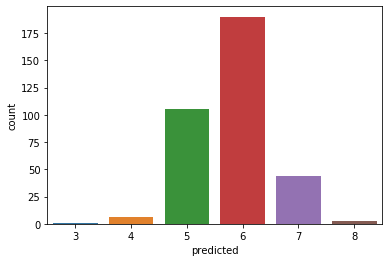

In [47]:
sns.countplot(x="predicted", data=misclassified)

- a histogram showing the distribution of the correct wine quality in the misclassified dataset

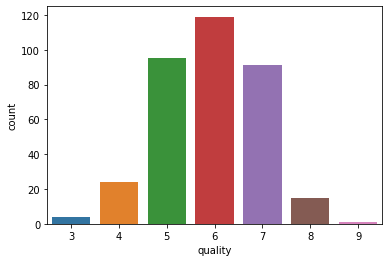

In [48]:
sns.countplot(x="quality", data=misclassified)

- Predicted quality vs Original quality in the misclassified dataset

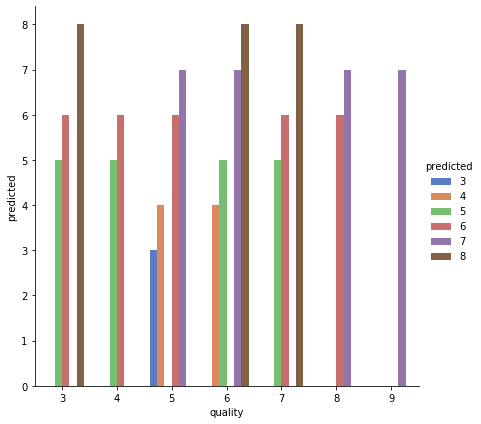

In [49]:
sns.catplot(x="quality", y="predicted", hue="predicted", data=misclassified,
                height=6, kind="bar", palette="muted")

- Predicted quality vs Original quality in the full dataset

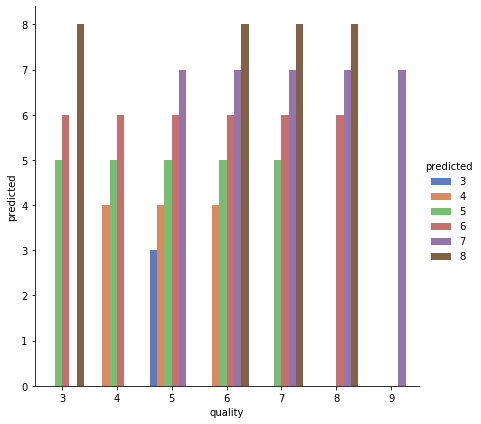

In [50]:
g = sns.catplot(x="quality", y="predicted", hue="predicted", data=full,
                height=6, kind="bar", palette="muted")